In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
mpg_df = pd.read_csv('C:/ex/data/auto_mpg_copy.csv')

In [4]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# 0.425143707 1 mpg = 0.425143707 km/l

In [7]:
mpg_df['mpg'] * 0.425143707

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: mpg, Length: 398, dtype: float64

In [8]:
mpg_df['mpg'] 

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [9]:
mpg_df['kpl'] = round(mpg_df['mpg'] * 0.425143707, 2)

In [10]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.23


In [11]:
mpg_df.horsepower.dtype

dtype('O')

In [12]:
mpg_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
help(mpg_df['horsepower'].where)

Help on method where in module pandas.core.generic:

where(cond, other=nan, *, inplace: 'bool_t' = False, axis: 'Axis | None' = None, level: 'Level | None' = None) -> 'Self | None' method of pandas.core.series.Series instance
    Replace values where the condition is False.

    Parameters
    ----------
    cond : bool Series/DataFrame, array-like, or callable
        Where `cond` is True, keep the original value. Where
        False, replace with corresponding value from `other`.
        If `cond` is callable, it is computed on the Series/DataFrame and
        should return boolean Series/DataFrame or array. The callable must
        not change input Series/DataFrame (though pandas doesn't check it).
    other : scalar, Series/DataFrame, or callable
        Entries where `cond` is False are replaced with
        corresponding value from `other`.
        If other is callable, it is computed on the Series/DataFrame and
        should return scalar or Series/DataFrame. The callable must

In [14]:
mpg_df['horsepower'] == '?'

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [15]:
mpg_df[mpg_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,10.63
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,8.93
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,17.39
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,10.03
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,14.67
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,9.78


In [16]:
mpg_df['horsepower'].replace('?', np.nan, inplace=True)

C:\Users\ysj\AppData\Local\Temp\ipykernel_18200\785376635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mpg_df['horsepower'].replace('?', np.nan, inplace=True)


In [17]:
mpg_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [18]:
mpg_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [19]:
mpg_df['horsepower'] = mpg_df['horsepower'].astype('float')

In [20]:
mpg_df['horsepower'].dtype

dtype('float64')

In [21]:
mpg_df['horsepower'].mean()

104.46938775510205

In [22]:
mpg_df['origin'] # 1은 USA, 2는 EU, 3은 JAPAN

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [23]:
mpg_df['origin'].value_counts(dropna=False)

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [24]:
mpg_df['origin'].replace(1, 'USA', inplace=True)
mpg_df['origin'].replace(2, 'EU', inplace=True)
mpg_df['origin'].replace(3, 'JAPAN', inplace=True)

# mpg_df['origin'].replace({1 : 'USA', 2 : 'EU', 3 : 'JAPAN'}, inplace=True)

In [25]:
mpg_df['origin'].value_counts(dropna=False)

origin
USA      249
JAPAN     79
EU        70
Name: count, dtype: int64

In [26]:
mpg_df['origin']

0      USA
1      USA
2      USA
3      USA
4      USA
      ... 
393    USA
394     EU
395    USA
396    USA
397    USA
Name: origin, Length: 398, dtype: object

In [27]:
mpg_df['origin'].unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

In [28]:
mpg_df['origin'] = mpg_df['origin'].astype('category') # 범주형 데이터로 변환

In [29]:
mpg_df['origin'].dtype

CategoricalDtype(categories=['EU', 'JAPAN', 'USA'], ordered=False, categories_dtype=object)

In [30]:
mpg_df['origin'] = mpg_df['origin'].astype('str') 

In [31]:
mpg_df['origin'].dtype

dtype('O')

In [32]:
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'kpl'],
      dtype='object')

In [33]:
mpg_df['model year']

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model year, Length: 398, dtype: int64

In [34]:
mpg_df['model year'].sample(1)

145    74
Name: model year, dtype: int64

In [35]:
mpg_df['model year'].sample(2)

275    78
204    76
Name: model year, dtype: int64

In [36]:
mpg_df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [37]:
mpg_df['horsepower'].mean()

104.46938775510205

In [38]:
mpg_df['horsepower'].fillna(round(mpg_df['horsepower'].mean(),0), inplace=True)

In [39]:
mpg_df['horsepower'].isna().sum()

0

In [40]:
mpg_df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       104., 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [41]:
mpg_df['horsepower'].max()

230.0

In [42]:
mpg_df['horsepower'].min()

46.0

In [43]:
import pandas as pd

In [44]:
df1 = pd.read_csv('C:/ex/data/복용전.csv', encoding='cp949')

In [45]:
df1.values

array([[73],
       [74],
       [76],
       [71],
       [76],
       [68],
       [75],
       [61],
       [68],
       [75],
       [70],
       [71],
       [71],
       [70],
       [67],
       [73],
       [74],
       [50],
       [76],
       [68],
       [75],
       [74],
       [73],
       [69],
       [68],
       [75],
       [61],
       [68],
       [75],
       [67],
       [73],
       [74],
       [50],
       [71],
       [76],
       [68],
       [75],
       [61],
       [68],
       [75],
       [70],
       [71],
       [71],
       [70],
       [67],
       [73],
       [74],
       [50],
       [76],
       [68],
       [69],
       [68],
       [75],
       [61],
       [68],
       [75],
       [67],
       [73],
       [74],
       [50],
       [71],
       [76],
       [70],
       [71],
       [71],
       [70],
       [67],
       [73],
       [74],
       [50],
       [76],
       [68],
       [74],
       [50],
       [76],
       [68],
       [69],

In [46]:
print(max(df1.values))
print(min(df1.values))

[76]
[50]


In [47]:
df1.values.reshape(1, 100)

array([[73, 74, 76, 71, 76, 68, 75, 61, 68, 75, 70, 71, 71, 70, 67, 73,
        74, 50, 76, 68, 75, 74, 73, 69, 68, 75, 61, 68, 75, 67, 73, 74,
        50, 71, 76, 68, 75, 61, 68, 75, 70, 71, 71, 70, 67, 73, 74, 50,
        76, 68, 69, 68, 75, 61, 68, 75, 67, 73, 74, 50, 71, 76, 70, 71,
        71, 70, 67, 73, 74, 50, 76, 68, 74, 50, 76, 68, 69, 68, 75, 61,
        68, 75, 70, 67, 73, 74, 50, 76, 76, 70, 71, 71, 70, 67, 61, 68,
        75, 70, 67, 71]], dtype=int64)

In [48]:
df2 = df1.values.ravel()

In [49]:
import seaborn as sns

In [50]:
import matplotlib.pyplot as plt

In [51]:
import numpy as np

In [52]:
np.arange(50, 90, 5)

array([50, 55, 60, 65, 70, 75, 80, 85])

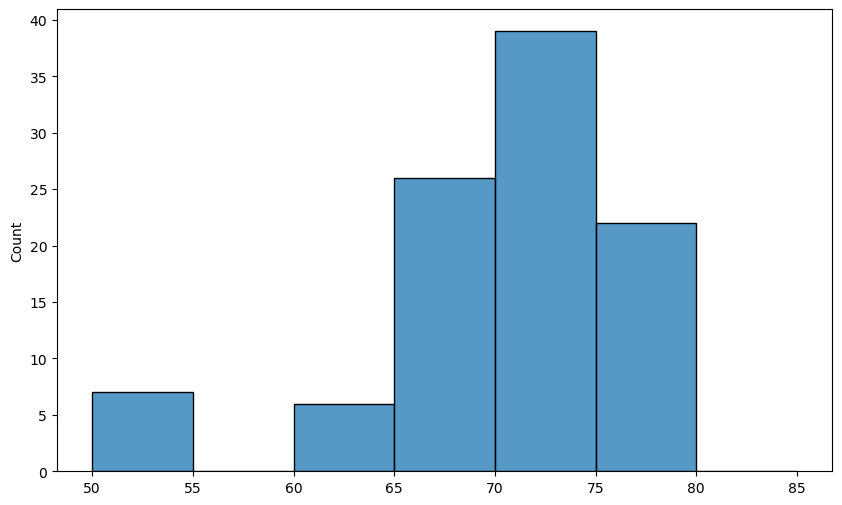

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(df2, bins=np.arange(50, 90, 5))
plt.show()

In [54]:
df3 = pd.read_csv('C:/ex/data/복용후.csv', encoding='cp949')

In [55]:
df3

,복용 후
0,73
1,74
2,76
3,71
4,76
...,...
95,68
96,75
97,70
98,67


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


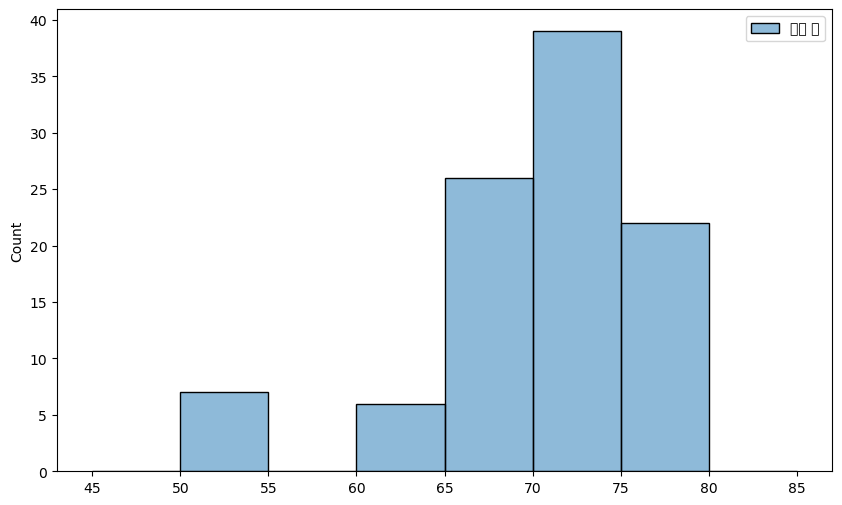

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(df3, bins=np.array(np.arange(45,90,5)))
plt.show()

In [57]:
print(max(mpg_df['horsepower']))
print(min(mpg_df['horsepower']))

230.0
46.0


In [58]:
(max(mpg_df['horsepower']) - min(mpg_df['horsepower'])) / 3

61.333333333333336

In [59]:
interval = (max(mpg_df['horsepower']) - min(mpg_df['horsepower'])) / 3

In [60]:
low = min(mpg_df['horsepower']) + interval
medium = low + interval
high = medium + interval

In [61]:
print(f"46.0 ~ {low} : 저출력")
print(f"{low} ~ {medium} : 보통출력")
print(f"{medium} ~ {high} : 고출력")

46.0 ~ 107.33333333333334 : 저출력
107.33333333333334 ~ 168.66666666666669 : 보통출력
168.66666666666669 ~ 230.00000000000003 : 고출력


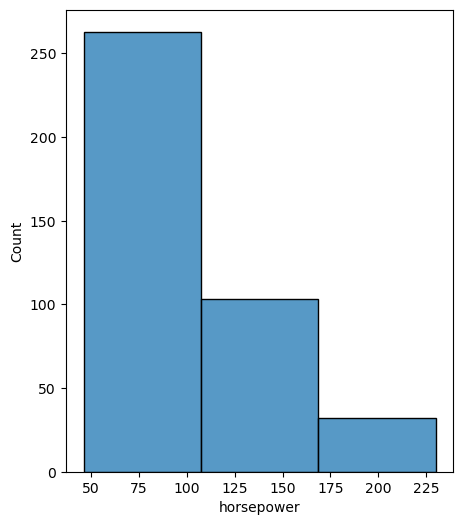

In [62]:
plt.figure(figsize=(5,6))
sns.histplot(mpg_df['horsepower'], bins=np.arange(46, 231, interval))
plt.show()

In [64]:
mpg_df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [65]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino,7.23


In [66]:
# 마력을 3구간으로 해서 다시

In [67]:
mpg_df.horsepower.isna().sum()

0

In [68]:
bin_names = ['저출력', '보통출력', '고출력']

In [69]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: 'bool' = True, labels=None, retbins: 'bool' = False, precision: 'int' = 3, include_lowest: 'bool' = False, duplicates: 'str' = 'raise', ordered: 'bool' = True)
    Bin values into discrete intervals.

    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.

    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.

        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
    

In [70]:
count, bins_dividers = np.histogram(mpg_df['horsepower'], bins=3)

In [72]:
pd.cut(x=mpg_df['horsepower'], bins=bins_dividers, labels=bin_names,include_lowest=True)

0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: horsepower, Length: 398, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [75]:
mpg_df['hp_bin'] = pd.cut(x=mpg_df['horsepower'], bins=bins_dividers, labels=bin_names,include_lowest=True)


In [73]:
arr = np.array(['남','여','남','여','남'])

In [74]:
pd.get_dummies(arr)

,남,여
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False


In [76]:
pd.get_dummies(mpg_df['hp_bin'])

,저출력,보통출력,고출력
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
393,True,False,False
394,True,False,False
395,True,False,False
396,True,False,False


## 정규화

### 최소-최대 정규화(Min Max Normalization)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [80]:
scaler.fit(data)

MinMaxScaler()

In [81]:
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [82]:
mpg_df.horsepower.describe()

count    398.000000
mean     104.462312
std       38.199230
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [83]:
mpg_df.horsepower.values.reshape(398, -1)

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.],
       [170.],
       [160.],
       [150.],
       [225.],
       [ 95.],
       [ 95.],
       [ 97.],
       [ 85.],
       [ 88.],
       [ 46.],
       [ 87.],
       [ 90.],
       [ 95.],
       [113.],
       [ 90.],
       [215.],
       [200.],
       [210.],
       [193.],
       [ 88.],
       [ 90.],
       [ 95.],
       [104.],
       [100.],
       [105.],
       [100.],
       [ 88.],
       [100.],
       [165.],
       [175.],
       [153.],
       [150.],
       [180.],
       [170.],
       [175.],
       [110.],
       [ 72.],
       [100.],
       [ 88.],
       [ 86.],
       [ 90.],
       [ 70.],
       [ 76.],
       [ 65.],
       [ 69.],
       [ 60.],
       [ 70.],
       [ 95.],
       [ 80.],
       [ 54.],
       [ 90.],
       [ 86.],
       [165.],
       [175.],
       [150.],
       [153.],
       [15

In [84]:
scaler.fit(mpg_df.horsepower.values.reshape(398, -1))

MinMaxScaler()

In [86]:
scaler.transform(mpg_df.horsepower.values.reshape(398, -1))

array([[0.45652174],
       [0.64673913],
       [0.56521739],
       [0.56521739],
       [0.51086957],
       [0.82608696],
       [0.94565217],
       [0.91847826],
       [0.97282609],
       [0.7826087 ],
       [0.67391304],
       [0.61956522],
       [0.56521739],
       [0.97282609],
       [0.26630435],
       [0.26630435],
       [0.27717391],
       [0.21195652],
       [0.22826087],
       [0.        ],
       [0.22282609],
       [0.23913043],
       [0.26630435],
       [0.36413043],
       [0.23913043],
       [0.91847826],
       [0.83695652],
       [0.89130435],
       [0.79891304],
       [0.22826087],
       [0.23913043],
       [0.26630435],
       [0.31521739],
       [0.29347826],
       [0.32065217],
       [0.29347826],
       [0.22826087],
       [0.29347826],
       [0.64673913],
       [0.70108696],
       [0.58152174],
       [0.56521739],
       [0.72826087],
       [0.67391304],
       [0.70108696],
       [0.34782609],
       [0.14130435],
       [0.293

### 표준화(Z-score normalization)

In [88]:
data2 = [[166, 55], [168, 40], [170, 80], [172, 93], [174, 77]]

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
std_scaler = StandardScaler()

In [91]:
std_scaler.fit_transform(data2)

array([[-1.41421356, -0.73827505],
       [-0.70710678, -1.52928404],
       [ 0.        ,  0.58007326],
       [ 0.70710678,  1.26561438],
       [ 1.41421356,  0.42187146]])

### 모자이크 그래프
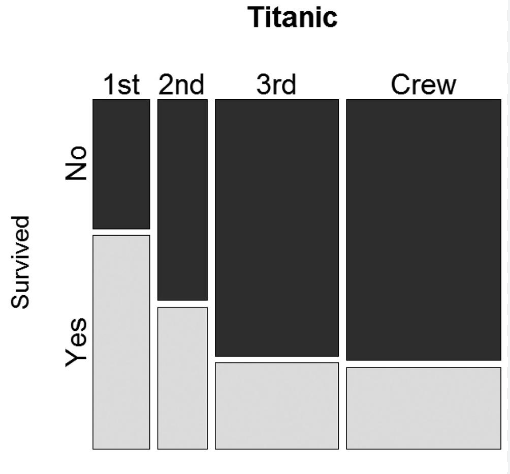

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('titanic')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [100]:
# 다변량 박스플롯

In [105]:
np.random.seed(10) # 동일한 숫자를 보기위해서는 난수표를 동일한 숫자로 설정

In [106]:
np.random.randint(0, 10)

9

In [107]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)

    Draw random samples from a normal (Gaussian) distribution.

    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).

    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.

    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") o

In [109]:
np.random.normal(0, 1)

-1.9069318981400183